# Positions and Influence



## Readings

- Scott, J. (2017). Social network analysis (4th edition) (Ch. 6). SAGE Publications.
- Borgatti, S. P. (2005). Centrality and network flow. Social Networks, 27(1), 55–71. https://doi.org/10.1016/j.socnet.2004.11.008
- Russo, T. C., & Koesten, J. (2005). Prestige, centrality, and learning: A social network analysis of an online class. Communication Education, 54(3), 254–261. https://doi.org/10.1080/03634520500356394


In this part, you'll explore ways of measuring the importance or centrality of a node in a network, using measures such as Degree, Closeness, and Betweenness centrality, and Page Rank. You'll learn about the assumptions each measure makes, the algorithms we can use to compute them, and the different functions available on NetworkX to measure centrality. 


## Node Importance

Social network analysis is usually interested in answering this question: *Based on the structure of the network, which are the most important nodes?*

SNA offers different ways of thinking about “importance”.

Let's load the Karate Club network from `NetworkX` to explore different measures of node importance.

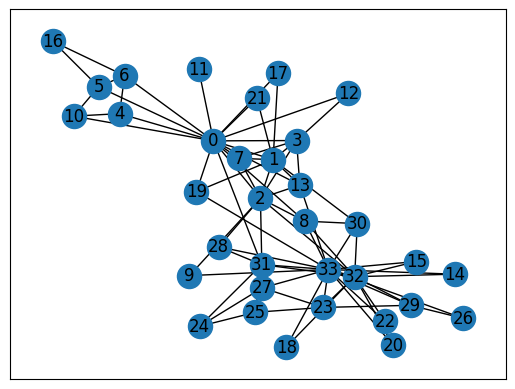

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

nx.draw_networkx(G)

## Centrality

Centrality measures identify the most important nodes in a network:

- Influential nodes in a social network
- Nodes that disseminate information to many nodes or prevent epidemics
- Hubs in a transportation network
- Important pages on the Web
- Nodes that prevent the network from breaking up

### Degree centrality

Assumption: important nodes have many connections.

**Degree**: number of neighbors.

Undirected networks: use degree

Directed networks: use in-degree or out-degree

**Degree centrality**: controls for the size of the network

![](img/degree_cen.png)

In [2]:
nx.degree(G)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

The degree centrality of node 0 would be: 16 / (34-1) = 0.48

A faster way to calculate degree centrality of all nodes is to use the `degree_centrality` function:

In [3]:
degree_cen = nx.degree_centrality(G)
degree_cen[0]

0.48484848484848486

For directed networks, in-degree and out-degree are differentiated. 

Use `in_degree_centrality` and `out_degree_centrality` instead. 


### Closeness Centrality

Assumption: important nodes are close to other nodes.

![](img/close_cen.png)



In [4]:
close_cen = nx.closeness_centrality(G)
close_cen[0]

0.5689655172413793

In [5]:
sum(nx.shortest_path_length(G, 0).values())

58

In [6]:
(len(G.nodes())-1)/58

0.5689655172413793

In a triangle, the closeness centrality of each node is 1, because each node is one hop away from the other two nodes. 

In a square, the closeness centrality of each node is 0.75, because each node is one hop away from two other nodes and two hops away from the fourth node. The closeness centrality = (4 - 1) / (1 + 1 + 2) = 3/4. 

{0: 0.75, 1: 0.75, 2: 0.75, 3: 0.75}


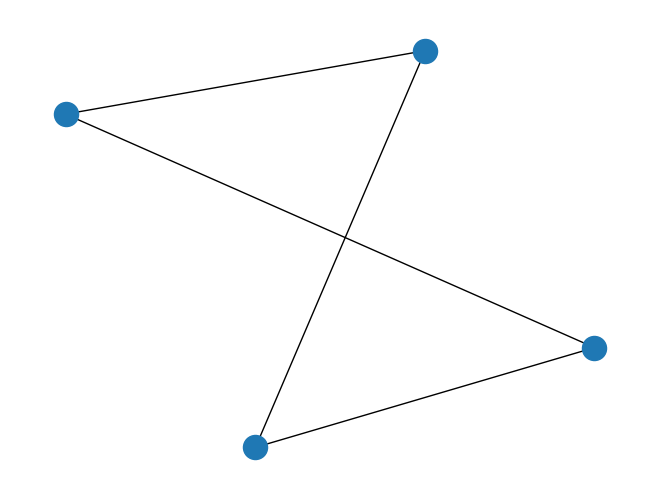

In [7]:
square = nx.cycle_graph(4)
nx.draw_spring(square)
print(nx.closeness_centrality(square))

### Betweenness Centrality

Assumption: important nodes connect other nodes.

Betweeness centrality for node N is computed as:

- The percent of cases where
- For each pair of nodes M and P (which are not N)
- The shortest path from M to P passes through N

Normalization: betwenness centrality values will be larger in graphs with many nodes. To control for this, we divide centrality values by the number of pairs of nodes in the graph (excluding the considered node).

In [8]:
btwn_cen = nx.betweenness_centrality(G, normalized = True)
btwn_cen[0]

0.43763528138528146

We can identify the top 5 nodes with the highest betweenness centrality:

In [9]:
import operator
sorted(btwn_cen.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325)]

### Eigenvector Centrality

Complex math, but assigns centrality to nodes through recursive process where

- More and stronger connections are positive
- Connections to nodes with higher eigenvector centrality contribute more than connections to nodes with lower eigenvector centrality

A key part of the original PageRank in Google


In [10]:
eigen_cen = nx.eigenvector_centrality(G)
sorted(eigen_cen.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[(33, 0.37337121301323506),
 (0, 0.35548349418519426),
 (2, 0.3171893899684447),
 (32, 0.3086510477336959),
 (1, 0.2659538704545024)]

Here, we see node 33 has higher eigenvector centrality than node 0, which has higher betweenness centrality. One reason is node 0 is connected to a bunch of nodes that are not as "central" as nodes connected with node 33. 

## Extract Node-level Features from the Network

These centality measures can be meaningful for different purposes. 

They can be used as features for other analyses. 

It is trivial to compute a range of node-level features and put them in a data frame. 

In [11]:
import pandas as pd

df = pd.DataFrame(index = G.nodes)
df['club'] = pd.Series(nx.get_node_attributes(G, 'club')) # extract node attribute 'club' in the network

In [12]:
df['degree'] = pd.Series(nx.degree(G))
df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
df['closeness_centrality'] = pd.Series(nx.closeness_centrality(G))
df['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True))
df['eigenvector_centrality'] = pd.Series(nx.eigenvector_centrality(G))

df

,club,degree,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,Mr. Hi,"(0, 16)",0.484848,0.568966,0.437635,0.355483
1,Mr. Hi,"(1, 9)",0.272727,0.485294,0.053937,0.265954
2,Mr. Hi,"(2, 10)",0.303030,0.559322,0.143657,0.317189
3,Mr. Hi,"(3, 6)",0.181818,0.464789,0.011909,0.211174
4,Mr. Hi,"(4, 3)",0.090909,0.379310,0.000631,0.075966
5,Mr. Hi,"(5, 4)",0.121212,0.383721,0.029987,0.079481
6,Mr. Hi,"(6, 4)",0.121212,0.383721,0.029987,0.079481
7,Mr. Hi,"(7, 4)",0.121212,0.440000,0.000000,0.170955
8,Mr. Hi,"(8, 5)",0.151515,0.515625,0.055927,0.227405
9,Officer,"(9, 2)",0.060606,0.434211,0.000848,0.102675


## Summary

Social network analysis provides a range of measures to depict the importance of a node. 

The interpretation of each measure depends on the particular context in which it's applied. 

Similar to measures of network connectivity, these node importance measures could also be further enrichsed by considering direction, weight, and temporality. Please consult additional resources if interested. 
